# IMPORT DES TABLES 

In [1]:
import numpy as np
import os
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Axel\Desktop\projet python\FrenchRestaurentData_V2.csv',index_col=0)
chef3 = pd.read_csv(r'C:\Users\Axel\Desktop\projet python\data_chef3_V2.csv',index_col=0)
chef2 = pd.read_csv(r'C:\Users\Axel\Desktop\projet python\data_chef2_V2.csv',index_col=0)
resto3=pd.read_csv(r'C:\Users\Axel\Desktop\projet python\data_resto3.csv',index_col=0)
resto2=pd.read_csv(r'C:\Users\Axel\Desktop\projet python\data_resto2.csv',index_col=0)
resto3_complet=pd.read_csv(r'C:\Users\Axel\Desktop\projet python\data_complet_resto3.csv',index_col=0)
resto2_complet=pd.read_csv(r'C:\Users\Axel\Desktop\projet python\data_complet_resto2.csv',index_col=0)

In [3]:
chef=pd.DataFrame(np.concatenate((chef3,chef2),axis=0))


,0,1,2,3,4,5,6
0,Michel Troisgros,1958-04-02,Français,NaN,62,1,3
1,Michel Guérard,1933-03-27,Français,NaN,87,1,3
2,Georges Blanc,1943-01-02,Français,"['3 étoiles au Guide Michelin', '4 toques au G...",77,2,3
3,Bernard Pacaud,1947-09-29,Français,['3 étoiles au Guide Michelin'],73,1,3
4,Pierre Gagnaire,1950-04-09,Français,NaN,70,1,3
...,...,...,...,...,...,...,...
59,Jean-François Piège,1970-09-25 00:00:00.000000000,Français,NaN,50,1,2
60,Pascal Barbot,1972-06-07 00:00:00.000000000,Français,NaN,48,1,2
61,Édouard Loubet,1970-09-25 00:00:00.000000000,Français,NaN,50,1,2
62,Alexandre Couillon,1975-12-01 00:00:00.000000000,Français,NaN,44,1,2


In [4]:
chef.columns=chef3.columns
chef.drop_duplicates(subset='nom',keep = 'first', inplace=True)
chef['nb_star_chef'].astype('category')

0     3.0
1     3.0
2     3.0
3     3.0
4     3.0
     ... 
59    2.0
60    2.0
61    2.0
62    2.0
63    2.0
Name: nb_star_chef, Length: 61, dtype: category
Categories (2, float64): [2.0, 3.0]

In [122]:
chef['age'].sort_values()

36    32
48    37
57    38
24    40
42    41
      ..
27    74
55    75
2     77
1     87
46    94
Name: age, Length: 61, dtype: object

Text(0.5, 1.0, "Distribution de l'age des chefs en fonction de leurs étoiles")

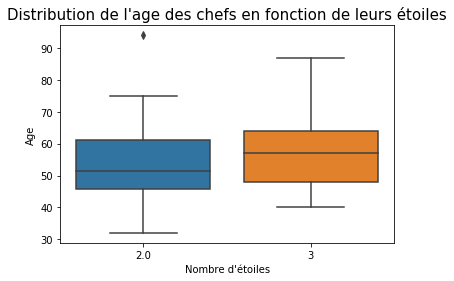

In [5]:
sns.boxplot(x='nb_star_chef',y='age',data=chef)
plt.xlabel("Nombre d'étoiles")
plt.ylabel("Age")
plt.title("Distribution de l'age des chefs en fonction de leurs étoiles", size=15)

On remarque une différence dans la distribution de l'age des chefs en fonction de leur nombre d'étoiles. En effet, les chefs 3 étoiles sont globalement plus agés que ceux 2 étoiles, le plus jeune des chefs 3 étoiles ayant 40 ans contre 32 pour le plus jeune 2 étoiles. De plus, on peut penser que cette différence d'age est sans doute plus importante, du au fait que seulement 48% des chefs 2 étoiles possèdent une page wikipédia alors que 100% des chefs 3 étoiles en ont une. Par conséquent, on peut supposer que l'abscence de page wikipédia est un signe jeunesse car celle-ci implique une popularité moins grande.

Text(0.5, 1.0, 'Distribution du nombre de distinctions des chefs en fonction de leurs étoiles')

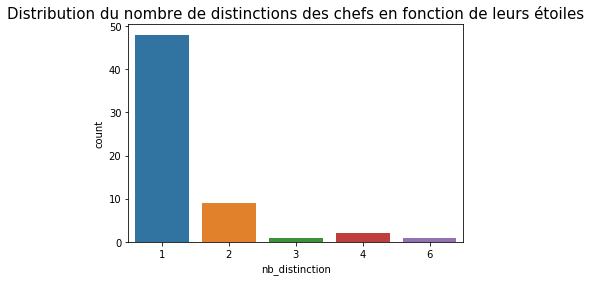

In [6]:
#faire des proportiton et hist collé
sns.countplot(x='nb_distinction',data=chef)
plt.title("Distribution du nombre de distinctions des chefs en fonction de leurs étoiles", size=15)

In [7]:
chef.loc[((chef['nb_star_chef']==2) & (chef['age']<85)),:]

,nom,naissance,nationalité,distinction,age,nb_distinction,nb_star_chef
25,Christian Sinicropi,1971-09-13 00:00:00.000000000,Français,"['2 étoiles au Guide Michelin', '18/20 au Gaul...",49,2,2
26,Bruno Oger,1966-05-09 00:00:00.000000000,Français,['2 étoiles au Guide Michelin'],54,1,2
27,Sébastien Bras,1946-11-04 00:00:00.000000000,Français,NaN,74,1,2
28,Jean-Luc Rabanel,1964-01-14 00:00:00.000000000,Français,['Chevalier des Arts et des Lettres'],56,2,2
29,Alexandre Mazzia,1976-04-30 00:00:00.000000000,Français,NaN,44,1,2
30,Patrick Bertron,1962-01-22 00:00:00.000000000,Français,NaN,58,1,2
31,Olivier Bellin,1971-08-08 00:00:00.000000000,Français,NaN,49,1,2
32,Michel Sarran,1961-04-18 00:00:00.000000000,Français,NaN,59,1,2
33,Bernard Bach,1961-03-16 00:00:00.000000000,Français,['2 étoiles au Guide Michelin'],59,1,2
34,Gordon Ramsay,1966-11-08 00:00:00.000000000,Britannique,NaN,54,1,2


plt.figure(figsize=(12,8))
total=len(chef.loc[((chef['nb_star_chef']==3) & (chef['age']<85)),'nb_distinction'])
ax=sns.countplot(x='nb_distinction',data=chef.loc[((chef['nb_star_chef']==3) & (chef['age']<85)),:])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
plt.title("Distribution du nombre de distinctions des chefs 3 étoiles", size=15)
ax.set(ylim=(0, 18))
plt.show()

plt.figure(figsize=(12,8))
total=len(chef.loc[((chef['nb_star_chef']==2) & (chef['age']<85)),'nb_distinction'])
ax=sns.countplot(x='nb_distinction',data=chef.loc[((chef['nb_star_chef']==2) & (chef['age']<85)),:])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total)*100),
            ha="center")
plt.title("Distribution du nombre de distinctions des chefs 2 étoiles", size=15)
ax.set(ylim=(0, 35))
plt.show()

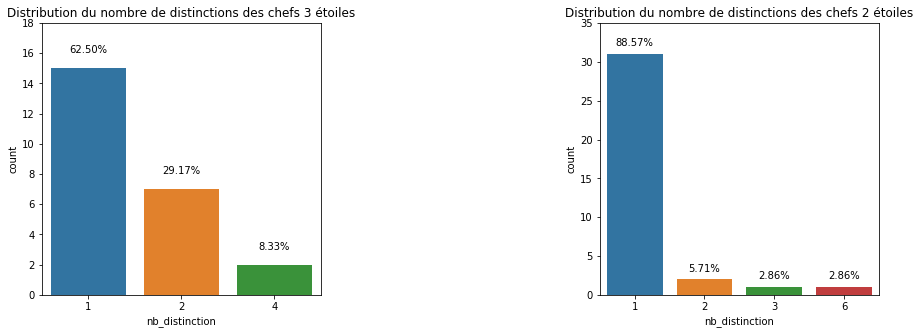

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
total3=len(chef.loc[((chef['nb_star_chef']==3) & (chef['age']<85)),'nb_distinction'])
ax3=sns.countplot(x='nb_distinction',data=chef.loc[((chef['nb_star_chef']==3) & (chef['age']<85)),:])
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total3)*100),
            ha="center")
ax3.set_title("Distribution du nombre de distinctions des chefs 3 étoiles")
ax3.set(ylim=(0, 18))
plt.subplot(1,2,2)
total2=len(chef.loc[((chef['nb_star_chef']==2) & (chef['age']<85)),'nb_distinction'])
ax2=sns.countplot(x='nb_distinction',data=chef.loc[((chef['nb_star_chef']==2) & (chef['age']<85)),:])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.2f}%'.format((height/total2)*100),
            ha="center")
ax2.set_title("Distribution du nombre de distinctions des chefs 2 étoiles")
ax2.set(ylim=(0, 35))
plt.subplots_adjust(wspace = 1)
plt.show()

Par défaut, les chefs possèdent une distinction liée au fait d'être le chef d'un restaurant étoilé. Cependant, on distingue que les chefs des restaurants 3 étoiles possèdent plus régulièrement une seconde distinctinction, tel que par exemple, le titre de meilleur ouvrier de France.

In [9]:
values=chef.groupby(['nationalité'])['nationalité'].count().values
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

Text(0.5, 1.0, 'Distribution des nationalités des chefs')

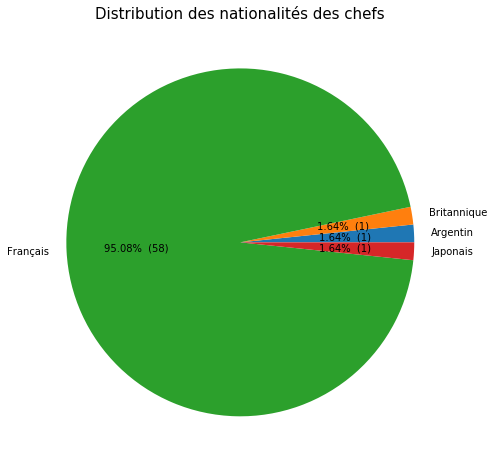

In [10]:
plt.figure(figsize=(12,8))
plt.pie(x=chef.groupby(['nationalité'])['nationalité'].count(), 
        labels=chef.groupby(['nationalité'])['nationalité'].count().index, autopct=make_autopct(values))
#plt.legend(loc='upper right')
plt.title("Distribution des nationalités des chefs", size=15)

On constate que mise à part quelques exeptions, la grande majorité des chefs doublement ou triplement étoilés en France sont français.

## stat table complet resto


### traitement de la table pour rajouter les prix

In [12]:
def recup2(liste):
    if len(liste)>1:
        return int(liste[1][0:4])
df['prix_max']=df['price'].fillna('').apply(str.split,args=("-")).apply(recup2)

In [13]:
def recup(liste):
    if len(liste)>1:
        return int(liste[0][0:4])
df['prix_min']=df['price'].fillna('').apply(str.split,args=("-")).apply(recup)

In [14]:
df['Michelin Stars'].astype('category')

0       1
1       0
2       0
3       0
4       0
       ..
3363    0
3364    0
3365    0
3366    0
3367    0
Name: Michelin Stars, Length: 3368, dtype: category
Categories (4, int64): [0, 1, 2, 3]

### stat sur prix

plt.figure()
axmin=sns.catplot(y='prix_max',x='Michelin Stars', hue='Michelin Stars', data=df)

df_max=df[['prix_max','Michelin Stars']]
m=np.full((len(df[['prix_max','Michelin Stars']]),1),'prix_max')
prix_max=pd.DataFrame(np.concatenate((df_max,m),axis=1))
prix_max.columns=['prix','etoile','type_prix']

df_min=df[['prix_min','Michelin Stars']]
m=np.full((len(df[['prix_min','Michelin Stars']]),1),'prix_min')
prix_min=pd.DataFrame(np.concatenate((df_min,m),axis=1))
prix_min.columns=['prix','etoile','type_prix']



prix=pd.DataFrame(np.concatenate((prix_min,prix_max),axis=0))
prix.columns=['prix','etoile','type_prix']

plt.figure(figsize=(12,20))
axpris=sns.catplot(y='prix',x='type_prix', hue='etoile', data=prix)
plt.title("Distribiution des prix en fonction du nombre d'étoiles")
plt.show()

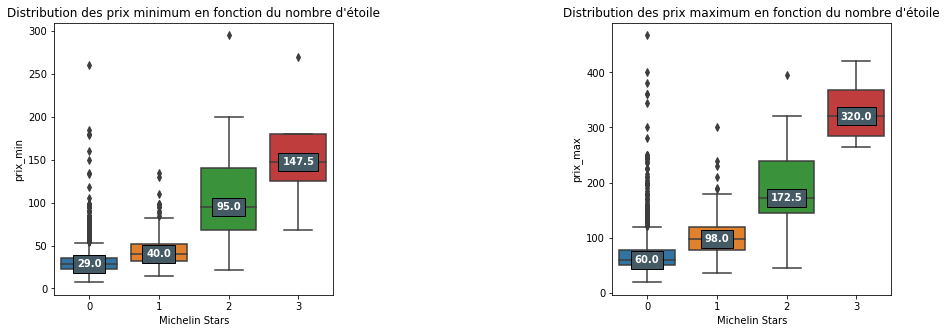

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
box_plot1=sns.boxplot(x='Michelin Stars',y='prix_min',data=df)
ax = box_plot1.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
box_plot1.set_title("Distribution des prix minimum en fonction du nombre d'étoiles")

plt.subplot(1,2,2)
box_plot2=sns.boxplot(x='Michelin Stars',y='prix_max',data=df)
ax = box_plot2.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
box_plot2.set_title("Distribution des prix maximum en fonction du nombre d'étoiles")
plt.subplots_adjust(wspace = 1)
plt.show()

On constate au vue de la médiane (statistique beaucoup plus adaptée que la moyenne dans ce cas-ci dû au grand nombre d'outliers dans les restaurants 0 et 1 étoile) que le montant maximum et minimum des menus augmente en fonction du nombre d'étoiles des restaurants. La moitié des restaurants non étoilés propose un menu le plus chère à un prix inférieur à 60 euros contre 320 euros pour les restaurants 3 étoiles.

### stat sur service

<Figure size 432x288 with 0 Axes>

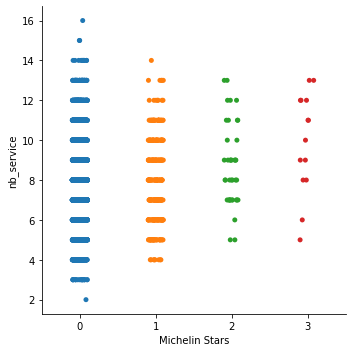

In [18]:
plt.figure()
axmin=sns.catplot(y='nb_service',x='Michelin Stars', hue='Michelin Stars', data=df)
#pas interessant

### stat sur specialté

In [25]:
df['specialite_1'].astype('str')
df['specialite_2'].astype('str')

0                              nan
1                              nan
2               Cuisine japonaise 
3        Spécialités de Grillades 
4                              nan
                   ...            
3363                           nan
3364                           nan
3365                           nan
3366                           nan
3367           Cuisine du terroir 
Name: specialite_2, Length: 3368, dtype: object

In [34]:
df['specialite_1']=df['specialite_1'].fillna('').apply(func=str.strip)
df['specialite_2']=df['specialite_2'].fillna('').apply(func=str.strip)

In [35]:
df['specialite_1'].astype('category')
df['specialite_2'].astype('category')

0                               
1                               
2              Cuisine japonaise
3       Spécialités de Grillades
4                               
                  ...           
3363                            
3364                            
3365                            
3366                            
3367          Cuisine du terroir
Name: specialite_2, Length: 3368, dtype: category
Categories (36, object): [, Cuisine actuelle, Cuisine alsacienne, Cuisine argentine, ..., Spécialités de Grillades, Spécialités de Viandes, Sushi, fondues et raclettes]

(df.loc[((df['Michelin Stars']==0) & (df['specialite_1'] != ''))].groupby(['specialite_1'])['specialite_1'].count().sort_values(ascending=False)).head(10).to_frame()

In [127]:
def special(nb_etoile,indice,xlim,ecart):
    dfe=df.loc[((df['Michelin Stars']==nb_etoile) & (df['specialite_1'] != ''))]
    total =len(dfe)

    ax=sns.countplot(y='specialite_1',data=dfe, order=dfe['specialite_1'].value_counts().iloc[:indice].index)
    for p in ax.patches:
        height = p.get_height()
        print(p.get_y())
        print(p.get_x())
        print(p.get_width())
        ax.text(p.get_width()+ecart,
                p.get_y()+0.5,
                '{:1.2f}%'.format((p.get_width()/total)*100),
                ha="center")
    ax.set(xlim=(0,xlim))
    ax.set_ylabel('Type de spécialité')
    ax.set_xlabel('Nombre de restaurants {etoile} étoiles'.format(etoile=nb_etoile))
    return ax

-0.4
0
1162
0.6
0
548
1.6
0
86
2.6
0
74
3.6
0
70
4.6
0
45
5.6
0
29
6.6
0
28
7.6
0
26
8.6
0
26
-0.4
0
139
0.6
0
41
1.6
0
10
2.6
0
9
3.6
0
5
4.6
0
4
5.6
0
3
6.6
0
2
7.6
0
2
8.6
0
2
-0.4
0
15
0.6
0
9
1.6
0
2
2.6
0
1
-0.4
0
2
0.6
0
2
1.6
0
1


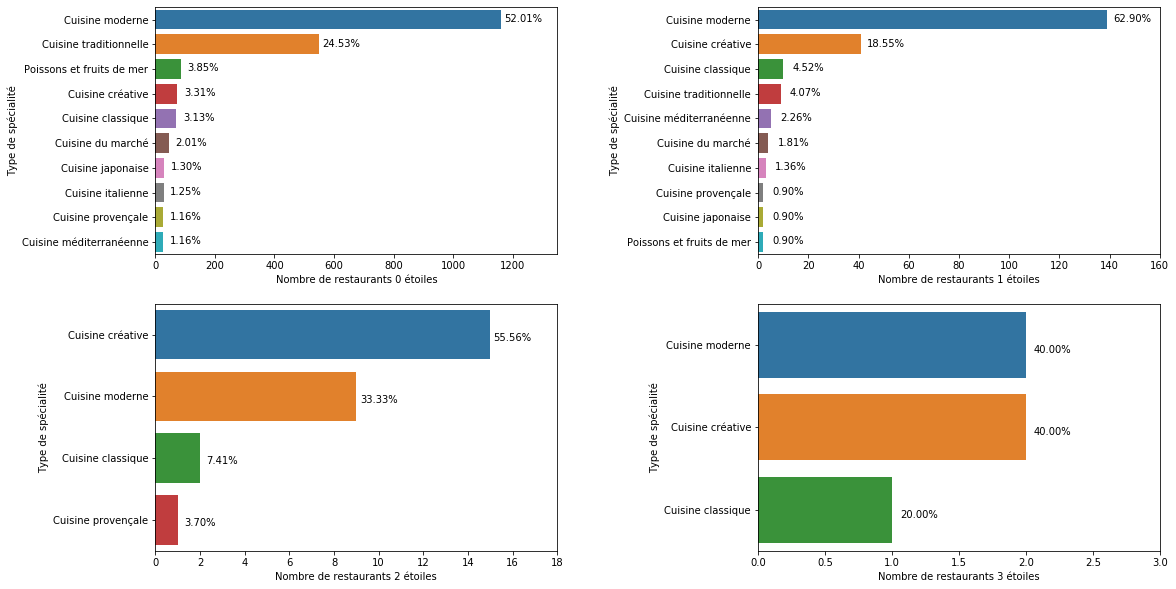

In [131]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
ax0=special(0,10,1350,75)

plt.subplot(2,2,2)
ax1=special(1,10,160,10)

plt.subplot(2,2,3)
ax2=special(2,10,18,1)

plt.subplot(2,2,4)
ax3=special(3,10,3,0.2)

plt.subplots_adjust(wspace = 0.5)
plt.show()

On remarque que la spécialité "cuisine moderne" est la spécialité tous étoiles confondues à la différence de la spécialité "cuisine créative" dont la part augmente avec le nombre d'étoiles. De plus, on trouve une grande variété de spécialités sur les restaurants 0 et 1 étoiles, qu'on ne retrouve pas sur les 2 et 3 étoiles. 

In [126]:
#df.loc[df['ville']==' Tarbes']

,Unnamed: 0.1,name,address,price,speciality,review,services,phone number,website,latitude,longitude,Michelin Stars,nb_service,pays,code,ville,specialite_1,specialite_2,prix_max,prix_min
445,445,L'Ambroisie,"48 rue de l'Abbé-Torné, Tarbes, 65000, France",NaN,Cuisine moderne,"Face à la cathédrale, cet ancien presbytère de...","['Restaurant non fumeur ', 'Repas en terrasse ...",+33 5 62 93 09 34,"Dates de fermetureFermé : lundi, soir : mardi...",43.234065,0.069773,3,6,France,65,Tarbes,Cuisine moderne,,NaN,NaN
925,925,Le Fil à la Patte,"30 rue Georges-Lassalle, Tarbes, 65000, France",NaN,NaN,L'atmosphère est conviviale et sans chichis da...,"['Restaurant non fumeur ', 'Air conditionné ',...",+33 5 62 93 39 23,"Dates de fermetureFermé : lundi, soir : du ma...",43.235073,0.070116,0,6,France,65,Tarbes,,,NaN,NaN
972,972,L'Empreinte,"2 rue Gaston-Manent, Tarbes, 65000, France",17 - 56 EUR,Cuisine moderne,"Ce petit restaurant cosy, avec sa cuisine ouve...","['Accès handicapés ', 'Restaurant non fumeur '...",NaN,NaN,43.232466,0.070654,0,7,France,65,Tarbes,Cuisine moderne,,56.0,17.0
1293,1293,Le Petit Gourmand,"62 avenue B.-Barère, Tarbes, 65000, France",23 - 55 EUR,Cuisine moderne,Sur une avenue proche du centre-ville de Tarbe...,"['Restaurant non fumeur ', 'Repas en terrasse ...",NaN,NaN,43.237995,0.070998,0,7,France,65,Tarbes,Cuisine moderne,,55.0,23.0
3275,3275,L'Arpège,"22 place de Verdun, Tarbes, 65000, France",NaN,NaN,Ce couple de chefs japonais signe une jolie cu...,"['Accès handicapés ', 'Restaurant non fumeur '...",NaN,NaN,43.233505,0.074353,0,7,France,65,Tarbes,,,NaN,NaN
